In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

In [2]:
results = np.load("../plots/test.npy")
#results = np.load("../plots/pixel300_batch50_obj46_disco/test.npy")

suep_ntracks = results[results[:,2] == 1][:,1]
suep_cl = results[results[:,2] == 1][:,0]
qcd_ntracks = results[results[:,2] == 0][:,1]
qcd_cl = results[results[:,2] == 0][:,0]

print(len(suep_ntracks))
print(len(qcd_ntracks))

49998
50002


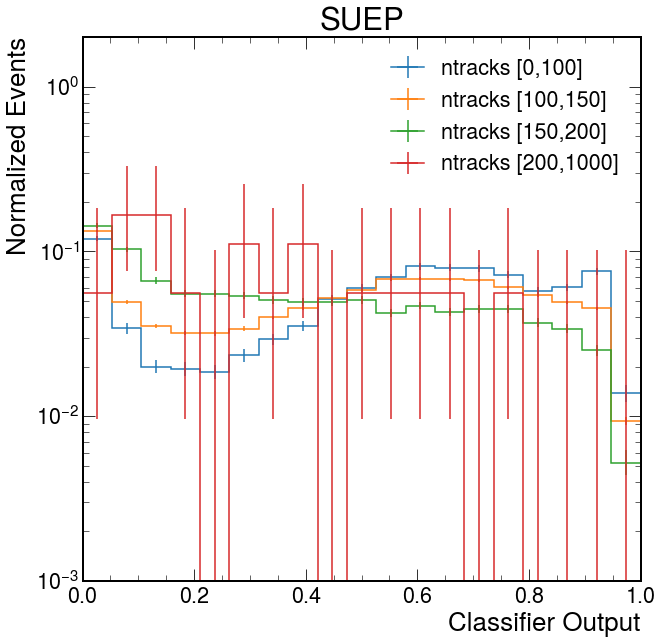

In [12]:
# parameters
save = True
slice_label = 'ntracks'            
slices = [[0,100],[100,150],[150,200],[200,1000]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

x=suep_ntracks
y=suep_cl

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    y_vals = y[(x>val_lo) & (x<=val_up)]
    norm = np.sum(y_vals) 
    bins = np.linspace(0,1,20)
    y_vals, bins = np.histogram(y_vals, bins=bins)
            
    hep.histplot(y_vals, bins, 
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo, val_up))    

plt.legend()
plt.title("SUEP")
plt.xlim(0.0,1.0)
plt.ylim(1e-3,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output")
if save: plt.savefig("SUEP_1D_slices.png",  bbox_inches='tight')

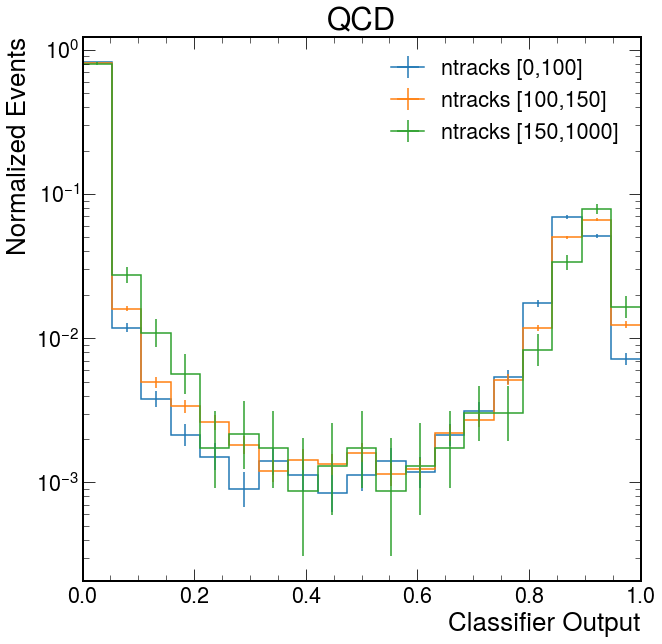

In [14]:
# parameters
save = True
slice_label = 'ntracks'            
# slices = [[0,100],[100,150],[150,200],[200,1000]]
slices = [[0,100],[100,150],[150,1000]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

x=qcd_ntracks
y=qcd_cl

for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    y_vals = y[(x>val_lo) & (x<=val_up)]
    norm = np.sum(y_vals) 
    bins = np.linspace(0,1,20)
    y_vals, bins = np.histogram(y_vals, bins=bins)
            
    hep.histplot(y_vals, bins, 
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo, val_up))

plt.legend()
plt.title("QCD")
plt.xlim(0.0,1.0)
#plt.ylim(1e-10,1)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output")
if save: plt.savefig("QCD_1D_slices.png",  bbox_inches='tight')